In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functions import read_params_and_metrics, graficar_correlacion

In [2]:
BASE_PATH = "/home/guillermo/Documents/SINC/Research/RNA/analysis/AEseq2seq/"
DATA_PATH = "notebooks/from_db/Unet/selection/v4p/"

columns = [
    "name",
    "run_uuid",
    "arc_num_conv1",
    "arc_num_layers",
    "arc_num_conv2",
    "arc_latent_dim",
    "arc_latent_volume",
    "arc_skip",
    "arc_encoder_blocks",
    "train_loss",
    "train_Accuracy",
    "train_Accuracy_seq",
    "valid_loss",
    "valid_Accuracy",
    "valid_Accuracy_seq",
    "test_loss",
    "test_Accuracy",
    "test_Accuracy_seq",
]
data, metrics = read_params_and_metrics(BASE_PATH, DATA_PATH, columns)

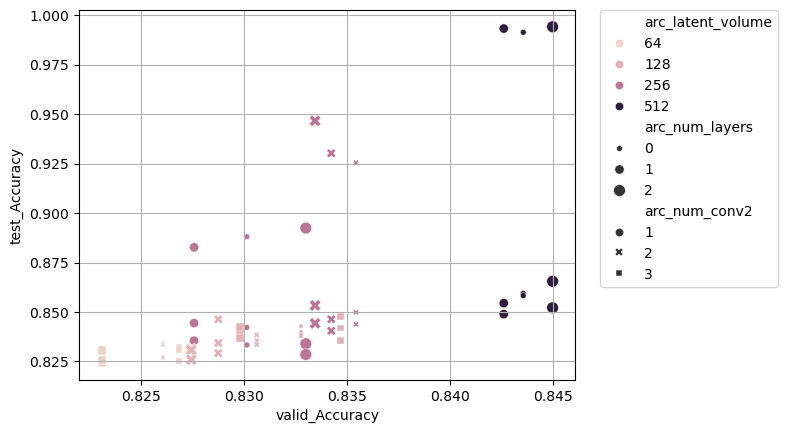

In [39]:
ax = sns.scatterplot(
    data=data[data["arc_skip"] == 0],
    x="valid_Accuracy",
    y="test_Accuracy",
    hue="arc_latent_volume",
    size="arc_num_layers",
    style="arc_num_conv2",
)
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

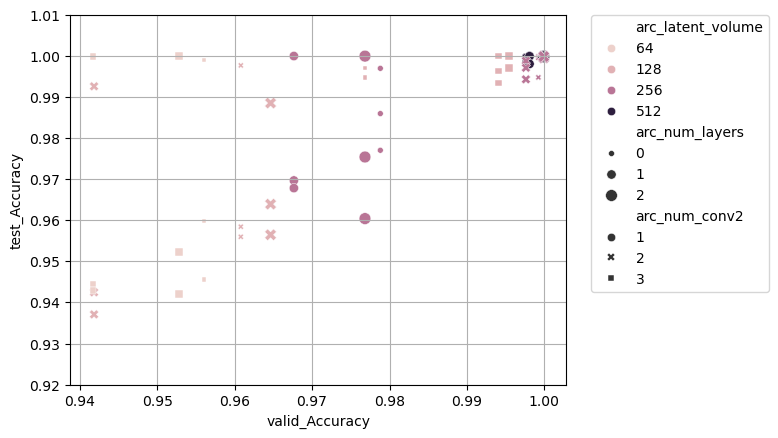

In [45]:
ax = sns.scatterplot(
    data=data[data["arc_skip"] == 1],
    x="valid_Accuracy",
    y="test_Accuracy",
    hue="arc_latent_volume",
    size="arc_num_layers",
    style="arc_num_conv2",
)
ax.grid()
ax.set_ylim(0.92, 1.01)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

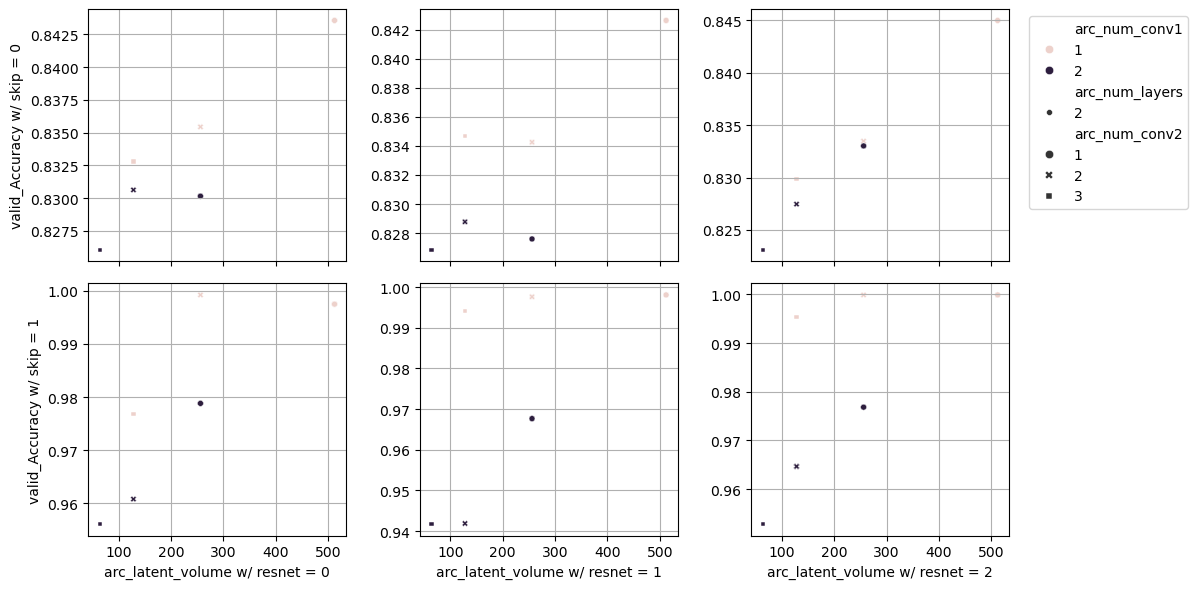

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True)
for s in [0, 1]:
    for r in [0, 1, 2]:
        if s == 0 and r == 2:
            sns.scatterplot(
                data=data.query("arc_skip == @s & arc_num_layers == @r"),
                x="arc_latent_volume",
                y="valid_Accuracy",
                hue="arc_num_conv1",
                size="arc_num_layers",
                style="arc_num_conv2",
                ax=axes[s, r],
            )
        else:
            sns.scatterplot(
                data=data.query("arc_skip == @s & arc_num_layers == @r"),
                x="arc_latent_volume",
                y="valid_Accuracy",
                hue="arc_num_conv1",
                size="arc_num_layers",
                style="arc_num_conv2",
                ax=axes[s, r],
                legend=False,
            )
        # axes[r, s].set_title("skip = " + str(s))
        axes[s, r].grid(True)
        axes[s, r].set_xlabel("")
        axes[s, r].set_ylabel("")
        if s == 1:
            axes[s, r].set(xlabel="arc_latent_volume w/ resnet = " + str(r))
        if r == 0:
            axes[s, r].set(ylabel="valid_Accuracy w/ skip = " + str(s))
axes[0, 2].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
fig.tight_layout()

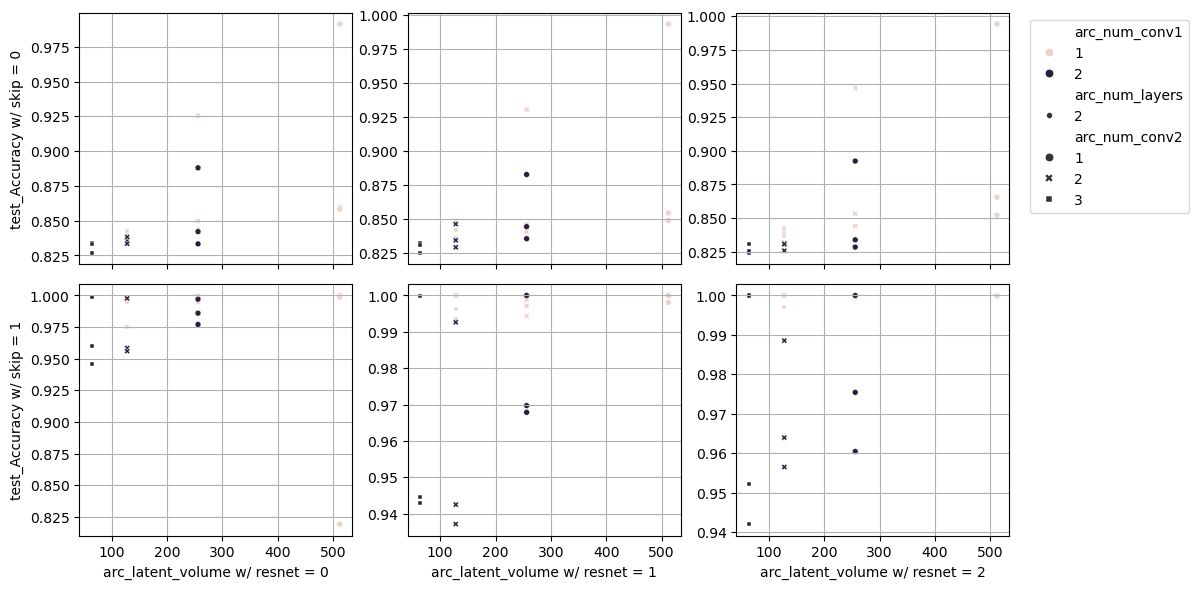

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True)
for s in [0, 1]:
    for r in [0, 1, 2]:
        if s == 0 and r == 2:
            sns.scatterplot(
                data=data.query("arc_skip == @s & arc_num_layers == @r"),
                x="arc_latent_volume",
                y="test_Accuracy",
                hue="arc_num_conv1",
                style="arc_num_conv2",
                size="arc_num_layers",
                ax=axes[s, r],
            )
        else:
            sns.scatterplot(
                data=data.query("arc_skip == @s & arc_num_layers == @r"),
                x="arc_latent_volume",
                y="test_Accuracy",
                hue="arc_num_conv1",
                style="arc_num_conv2",
                size="arc_num_layers",
                ax=axes[s, r],
                legend=False,
            )
        # axes[r, s].set_title("skip = " + str(s))
        axes[s, r].grid(True)
        axes[s, r].set_xlabel("")
        axes[s, r].set_ylabel("")
        if s == 1:
            axes[s, r].set(xlabel="arc_latent_volume w/ resnet = " + str(r))
        if r == 0:
            axes[s, r].set(ylabel="test_Accuracy w/ skip = " + str(s))
axes[0, 2].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
fig.tight_layout()

In [57]:
cols = [
    "arc_num_conv1",
    "arc_num_layers",
    "arc_num_conv2",
    "arc_latent_volume",
    "valid_loss",
    "valid_Accuracy",
    "valid_Accuracy_seq",
    "test_loss",
    "test_Accuracy",
    "test_Accuracy_seq",
]

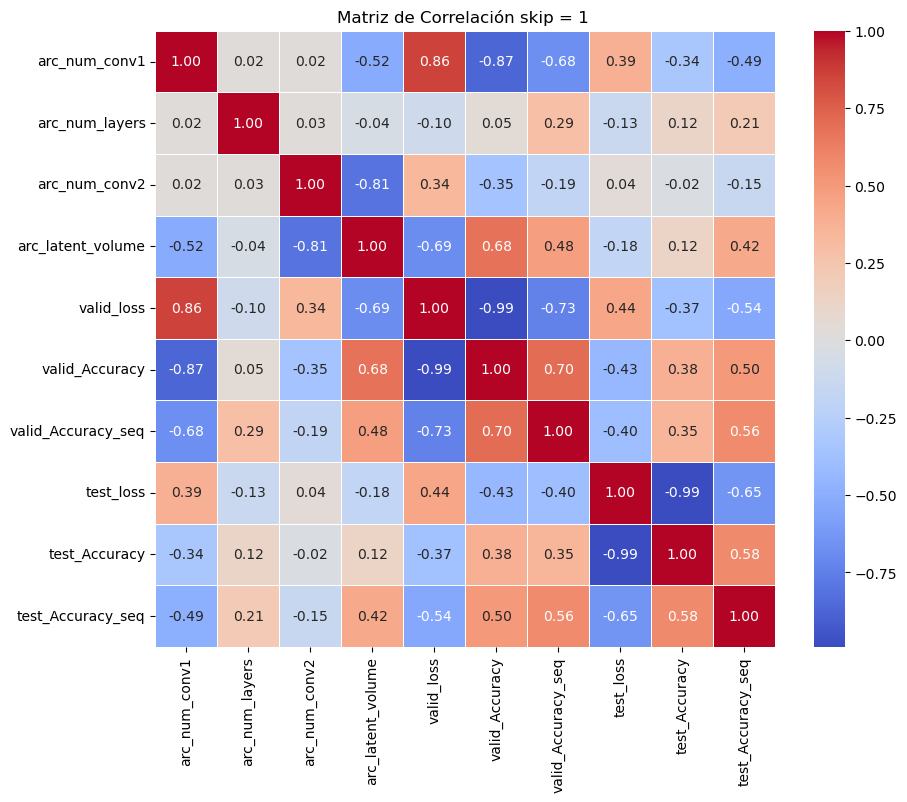

In [58]:
graficar_correlacion(
    data[data["arc_skip"] == 1], cols, "Matriz de Correlación skip = 1 "
)

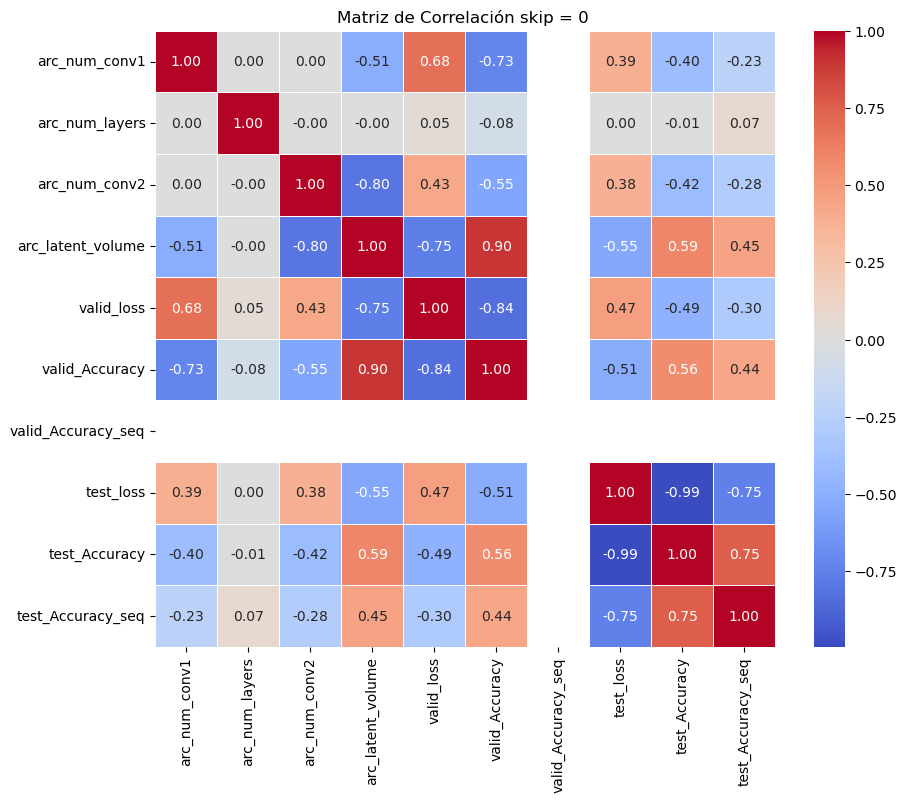

In [59]:
graficar_correlacion(
    data[data["arc_skip"] == 0], cols, "Matriz de Correlación skip = 0 "
)